<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [4]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

In [22]:
conda install lxml

Solving environment: ...working... done


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda




# All requested packages already installed.



## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [26]:
url = 'C:\\Users\\Ravi\\Documents\\Lambda School\\DS-Unit-4-Sprint-1-NLP\\module2-vector-representations\\data\\job_listings.csv'

df = pd.read_csv(url)
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [27]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [28]:
# Taking a look at the Beautiful Soup object
from bs4 import BeautifulSoup
import requests

object = BeautifulSoup(df['description'][0], 'lxml')

In [29]:
print(object.get_text())

b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"


In [30]:
# Creating new column in Data Frame with plain text

df['desc'] = [BeautifulSoup(text, 'lxml').get_text() for text in df['description']]

In [31]:
df.head()

,description,title,desc
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...


In [34]:
# Filtering for Data Scientist job title

df[df['title'] == 'Data Scientist']

,description,title,desc
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...
5,b'<div>Create various Business Intelligence An...,Data Scientist,b'Create various Business Intelligence Analyti...
7,"b""Everytown for Gun Safety, the nation's large...",Data Scientist,"b""Everytown for Gun Safety, the nation's large..."
12,"b""nfosys\xe2\x80\x93 Data &amp; Analytics \xe2...",Data Scientist,"b""nfosys\xe2\x80\x93 Data & Analytics \xe2\x80..."
...,...,...,...
408,b'<div><p>FinLocker is a leading financial dat...,Data Scientist,b'FinLocker is a leading financial data and an...
409,"b'<div><p>With annual sales of $15 billion, Ec...",Data Scientist,"b'With annual sales of $15 billion, Ecolab (EC..."
410,b'<div>Job Description:<br/>\n<br/>\nThe Enter...,Data Scientist,b'Job Description:\n\nThe Enterprise Data Solu...
411,"b""<div>Description:\n<p>Chicago - IL, IL150SW,...",Data Scientist,"b""Description:\nChicago - IL, IL150SW, 150 S W..."


In [48]:
# Creating new Data Frame with filtered results

df_ds = pd.DataFrame(df[df['title'] == 'Data Scientist'])
print(type(df_ds))
df_ds.head()

<class 'pandas.core.frame.DataFrame'>


,description,title,desc
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...
5,b'<div>Create various Business Intelligence An...,Data Scientist,b'Create various Business Intelligence Analyti...
7,"b""Everytown for Gun Safety, the nation's large...",Data Scientist,"b""Everytown for Gun Safety, the nation's large..."
12,"b""nfosys\xe2\x80\x93 Data &amp; Analytics \xe2...",Data Scientist,"b""nfosys\xe2\x80\x93 Data & Analytics \xe2\x80..."


## 2) Use Spacy to tokenize the listings 

In [44]:
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [52]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df_ds['desc'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (token.like_num == False) & (token.is_space == False) & (token.is_digit == False):
            doc_tokens.append(token.lemma_)

    tokens.append(doc_tokens)

df_ds['tokens'] = tokens

In [53]:
df_ds.head()

,description,title,desc,tokens
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...","[b'$4,969, $6,756, monthContractUnder, general..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,"[b'Location:, USA, \xe2\x80\x93, multiple, loc..."
5,b'<div>Create various Business Intelligence An...,Data Scientist,b'Create various Business Intelligence Analyti...,"[b'Create, Business, Intelligence, Analytical,..."
7,"b""Everytown for Gun Safety, the nation's large...",Data Scientist,"b""Everytown for Gun Safety, the nation's large...","[b""Everytown, Gun, Safety,, nation's, large, g..."
12,"b""nfosys\xe2\x80\x93 Data &amp; Analytics \xe2...",Data Scientist,"b""nfosys\xe2\x80\x93 Data & Analytics \xe2\x80...","[b""nfosys\xe2\x80\x93, Data, Analytics, \xe2\x..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [70]:
# Extracting description column from Data Frame and casting as a list

data = list(df_ds['desc'])

In [71]:
type(data)

list

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english', max_features=1000)

#Learn our Vocab
vect.fit(data)

# Get sparse dtm
dtm = vect.transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [73]:
dtm.head()

,10,100,500,abilities,ability,able,academic,access,accommodation,accommodations,...,x9d,xa2,xa6,xae,xb7,xc2,xe2,year,years,york
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,16,0,0,0,0,23,1,2,0


In [76]:
# Length of data list

len(data)

150

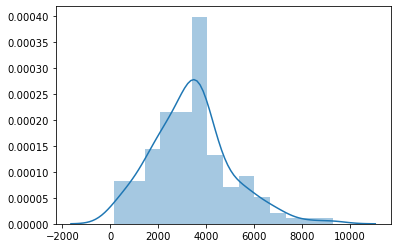

In [74]:
import seaborn as sns

doc_len = [len(doc) for doc in data]

sns.distplot(doc_len);

## 4) Visualize the most common word counts

In [77]:
# Function for analyzing word counts - Courtesy Lecture Notes

from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [79]:
word_count = count(data)
word_count.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
22,,150,66922,1.0,0.131837,0.131837,1.0
18,e,150,46929,2.0,0.092450,0.224287,1.0
31,n,150,37383,3.0,0.073645,0.297932,1.0
25,i,150,34745,4.0,0.068448,0.366380,1.0
39,a,150,34500,5.0,0.067965,0.434345,1.0


## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 